In [1]:
import numpy as np
import numpy.random as nr
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing, linear_model, metrics, datasets, multiclass, svm
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from nltk.corpus import stopwords
from itertools import cycle
from nltk.stem import PorterStemmer

In [2]:
#Reading the dataset.
df = pd.read_csv('complaints.csv', encoding='latin-1')

/var/folders/3n/y6l_g9s960lc_759jvhdhxp40000gn/T/ipykernel_1439/963416726.py:2: DtypeWarning: Columns (9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv', encoding='latin-1')


In [4]:
df.shape

(3041367, 18)

In [5]:
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [6]:
#Checks to see how many consumer complaints have non-null values.
pd.notnull(df['Consumer complaint narrative']).value_counts()

False    1949880
True     1091487
Name: Consumer complaint narrative, dtype: int64

In [7]:
#Create new df to hold only Products and Consumer complaint narratives.
df = df[['Product' , 'Consumer complaint narrative']]

In [8]:
#Shape of df before elimination of non-null values.
df.shape

(3041367, 2)

In [9]:
#Create new df to hold only non-null values of Consumer complaint narratives.
df = df[pd.notnull(df['Consumer complaint narrative'])]

In [11]:
#Shape of df after elimination of non-null values.
df.shape

(1091487, 2)

In [12]:
#Distribution of Complaint narratives by products.
df.groupby('Product').count()

,Consumer complaint narrative
Product,
Bank account or service,14885
Checking or savings account,53012
Consumer Loan,9470
Credit card,18838
Credit card or prepaid card,80366
Credit reporting,31588
"Credit reporting, credit repair services, or other personal consumer reports",499697
Debt collection,190256
"Money transfer, virtual currency, or money service",26082


<Figure size 1000x1000 with 0 Axes>

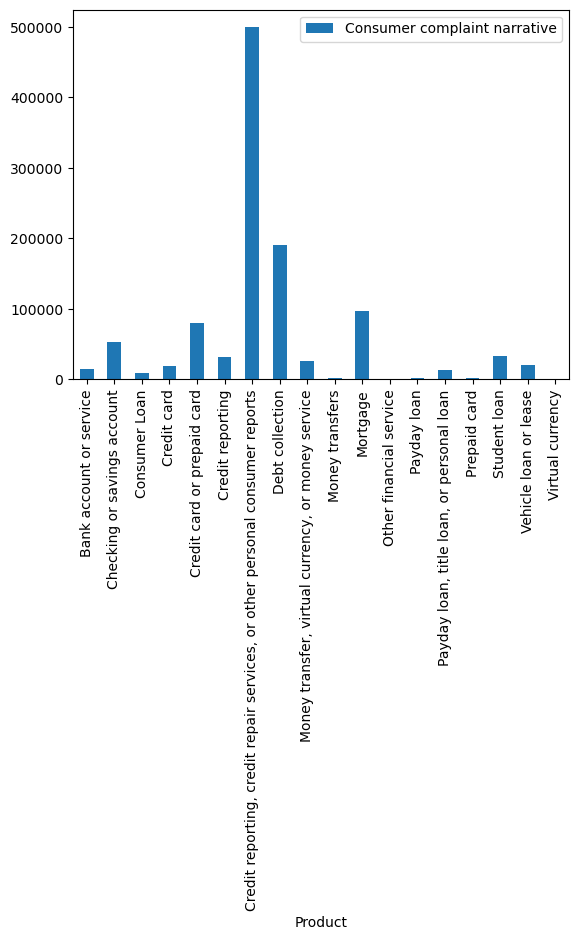

In [14]:
pltFig = plt.figure(figsize=(10, 10))
df.groupby('Product').count().plot.bar()
plt.show()